In [1]:
#Connect Google drive to colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [3]:
blog_df=pd.read_csv('/content/gdrive/MyDrive/NLPLab/Dataset - blogtext.csv')

In [4]:
blog_df.shape

(681284, 7)

In [5]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [6]:
blog_df = pd.read_csv("/content/gdrive/MyDrive/NLPLab/Dataset - blogtext.csv",nrows=100000)

In [7]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [8]:
blog_df.info()  # Checking info about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      100000 non-null  int64 
 1   gender  100000 non-null  object
 2   age     100000 non-null  int64 
 3   topic   100000 non-null  object
 4   sign    100000 non-null  object
 5   date    100000 non-null  object
 6   text    100000 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.3+ MB


In [9]:
blog_df.gender.value_counts()

male      53358
female    46642
Name: gender, dtype: int64

In [10]:
blog_df.isna().sum() #Checking Missing Values

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

# EDA 

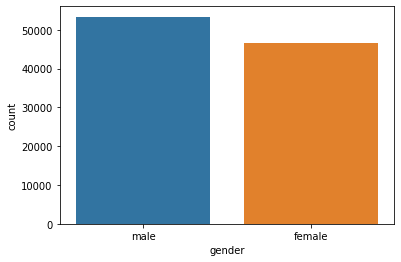

In [11]:
sns.countplot(x='gender',data=blog_df)

In [12]:
blog_df_10s=blog_df[(blog_df['age'] >=13) & (blog_df['age'] <= 17)]
print('Number of posts from age group 13-17: ', blog_df_10s.shape)
print('Total number of bloggers of age group 13-17: ',blog_df_10s.id.nunique())
blog_df_20s=blog_df[(blog_df['age'] >=23) & (blog_df['age'] <= 27)]
print('Number of posts from age group 23-27: ', blog_df_10s.shape)
print('Total number of bloggers of age group 23-27: ',blog_df_10s.id.nunique())
blog_df_30s=blog_df[(blog_df['age'] >=33) & (blog_df['age'] <= 47)]
print('Number of posts from age group 33-47: ', blog_df_10s.shape)
print('Total number of bloggers of age group 33-47: ',blog_df_10s.id.nunique())

Number of posts from age group 13-17:  (32730, 7)
Total number of bloggers of age group 13-17:  1198
Number of posts from age group 23-27:  (32730, 7)
Total number of bloggers of age group 23-27:  1198
Number of posts from age group 33-47:  (32730, 7)
Total number of bloggers of age group 33-47:  1198


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

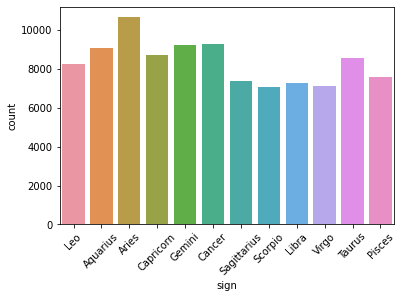

In [13]:
sns.countplot(x='sign',data=blog_df)
plt.xticks(rotation=45)

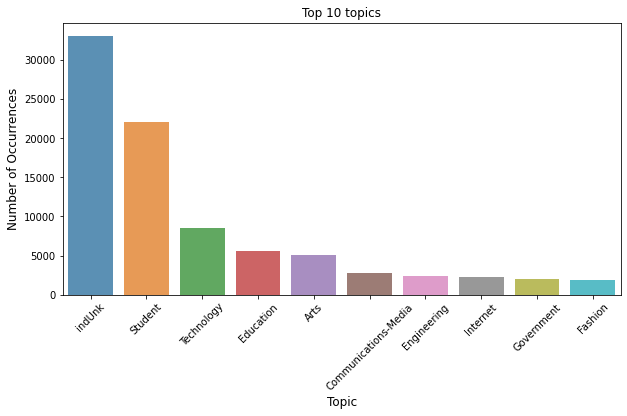

In [14]:
#top 10 Topics
topic_count=blog_df['topic'].value_counts()[:10]
plt.figure(figsize=(10,5))
s=sns.barplot(topic_count.index, topic_count.values, alpha=0.8,)
plt.xticks(rotation=45)
plt.title('Top 10 topics')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Topic', fontsize=12)
plt.show()
#most of the posts are for the topic indUnk

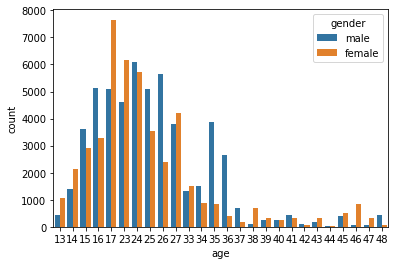

In [15]:
sns.countplot(x="age", hue="gender", data=blog_df)

# Preprocessing of the Text Column

In [16]:
pattern = "[^\w ]"
blog_df.text = blog_df.text.apply(lambda s : re.sub(pattern,"",s))
# removed unwanted chars other than alphanumeric

In [17]:
blog_df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",Info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members Drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoos Toolbar I can no...


In [18]:
blog_df.text = blog_df.text.apply(lambda s: s.lower()) #all the charters in lower case

In [19]:
#removed unwanted spaces
blog_df.text = blog_df.text.apply(lambda s: s.strip())

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
#remove stopwords
stopwords=set(stopwords.words('english'))

In [22]:
blog_df.text = blog_df.text.apply(lambda t: ' '.join([words for words in t.split() if words not in stopwords]) )

In [23]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files wait unti...
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...


In [24]:
# droped id and date columns
blog_df.drop(labels=['id','date'], axis=1,inplace=True)

In [25]:
blog_df['age'] = blog_df['age'].astype('str')

# Merged all the label columns together, so that we have all the labels together for a particular sentence

In [26]:
blog_df['labels'] = blog_df.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)

In [27]:
#drop  gender,age,topic & sign as they are already merged to labels column
blog_df.drop(columns=['gender','age','topic','sign'], axis=1, inplace=True)

In [28]:
blog_df.head()

,text,labels
0,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


In [29]:
X= blog_df.text
y = blog_df.labels

# Train and Test Split

In [30]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=83,test_size = 0.2)

In [31]:
print(X_train.shape)
print(y_train.shape)

(80000,)
(80000,)


In [32]:
print(X_test.shape)
print(y_test.shape)

(20000,)
(20000,)


# Vectorization of  the features



> CountVectorizer



In [33]:
cvect = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}', ngram_range=(1, 2),
             stop_words = 'english')

In [34]:
cvect.fit(X_train)

#Check the vocablury size
len(cvect.vocabulary_)

4422783

In [35]:
cvect.get_feature_names()[5000:5010]

['1 mom',
 '1 moment',
 '1 mondays',
 '1 money',
 '1 monkey',
 '1 month',
 '1 months',
 '1 mornin',
 '1 morning',
 '1 morocco']

In [36]:
X_train_ct = cvect.transform(X_train)

In [37]:
type(X_train_ct)

scipy.sparse.csr.csr_matrix

In [38]:
X_train_ct

<80000x4422783 sparse matrix of type '<class 'numpy.int64'>'
	with 12416059 stored elements in Compressed Sparse Row format>

In [39]:
X_train_ct[0]

<1x4422783 sparse matrix of type '<class 'numpy.int64'>'
	with 219 stored elements in Compressed Sparse Row format>

In [40]:
X_test_ct = cvect.transform(X_test)

In [41]:
X_test_ct

<20000x4422783 sparse matrix of type '<class 'numpy.int64'>'
	with 2174842 stored elements in Compressed Sparse Row format>

In [42]:
print(X_train_ct)

  (0, 12384)	1
  (0, 13217)	1
  (0, 155451)	1
  (0, 155599)	1
  (0, 169018)	1
  (0, 169224)	1
  (0, 198318)	1
  (0, 199005)	1
  (0, 221374)	1
  (0, 221671)	1
  (0, 279335)	1
  (0, 280307)	1
  (0, 376012)	1
  (0, 376042)	1
  (0, 411716)	1
  (0, 412544)	1
  (0, 454828)	1
  (0, 455616)	1
  (0, 538418)	1
  (0, 538419)	1
  (0, 553597)	1
  (0, 554095)	1
  (0, 557122)	1
  (0, 557202)	1
  (0, 597708)	1
  :	:
  (79998, 4058337)	1
  (79998, 4058966)	1
  (79998, 4105746)	1
  (79998, 4107647)	1
  (79998, 4119553)	1
  (79998, 4119559)	1
  (79998, 4184415)	1
  (79998, 4185637)	1
  (79998, 4193217)	1
  (79998, 4193315)	1
  (79998, 4283215)	1
  (79998, 4283543)	1
  (79998, 4310911)	1
  (79998, 4312313)	1
  (79999, 59902)	1
  (79999, 62993)	1
  (79999, 476441)	1
  (79999, 1365976)	1
  (79999, 1367510)	1
  (79999, 2228358)	1
  (79999, 2228649)	1
  (79999, 4114185)	1
  (79999, 4114338)	1
  (79999, 4376942)	1
  (79999, 4377678)	1


In [43]:
print(X_test_ct)

  (0, 6361)	1
  (0, 6756)	1
  (0, 37228)	1
  (0, 42019)	1
  (0, 42190)	1
  (0, 119102)	1
  (0, 119310)	1
  (0, 138443)	2
  (0, 138460)	2
  (0, 163475)	1
  (0, 208387)	1
  (0, 208690)	1
  (0, 242406)	1
  (0, 244640)	1
  (0, 315551)	1
  (0, 316390)	1
  (0, 344856)	2
  (0, 345459)	1
  (0, 346132)	1
  (0, 355095)	1
  (0, 371990)	1
  (0, 372248)	1
  (0, 373895)	1
  (0, 379626)	1
  (0, 379811)	1
  :	:
  (19999, 1347986)	1
  (19999, 1585221)	1
  (19999, 1589468)	1
  (19999, 1827712)	1
  (19999, 2137398)	1
  (19999, 2551198)	1
  (19999, 2551924)	1
  (19999, 2581766)	1
  (19999, 2668397)	1
  (19999, 2720906)	1
  (19999, 3173723)	1
  (19999, 3278383)	1
  (19999, 3320702)	1
  (19999, 3320886)	1
  (19999, 3564597)	1
  (19999, 3598152)	1
  (19999, 3712174)	1
  (19999, 3727889)	1
  (19999, 3728709)	1
  (19999, 3865523)	1
  (19999, 3867270)	1
  (19999, 4320359)	1
  (19999, 4324526)	1
  (19999, 4376942)	1
  (19999, 4378864)	1




> **Tfidf Vectorizer**



In [ ]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 2), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(X_train) )
X_train_tfv =  tfv.transform(X_train) 
X_test_tfv = tfv.transform(X_test)

Tried wit both CountVectorizer and TfidfVectorizer. But using CountVectorizer.

# Dictionary to get the count of every label

In [44]:
label_counts=dict()

for labels in blog_df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [45]:
label_counts

{'13': 1497,
 '14': 3540,
 '15': 6532,
 '16': 8406,
 '17': 12755,
 '23': 10757,
 '24': 11814,
 '25': 8660,
 '26': 8059,
 '27': 8007,
 '33': 2835,
 '34': 2388,
 '35': 4720,
 '36': 3045,
 '37': 863,
 '38': 801,
 '39': 568,
 '40': 513,
 '41': 772,
 '42': 156,
 '43': 505,
 '44': 76,
 '45': 906,
 '46': 914,
 '47': 397,
 '48': 514,
 'Accounting': 528,
 'Advertising': 766,
 'Agriculture': 168,
 'Aquarius': 9050,
 'Architecture': 83,
 'Aries': 10637,
 'Arts': 5031,
 'Automotive': 124,
 'Banking': 354,
 'Biotech': 324,
 'BusinessServices': 626,
 'Cancer': 9253,
 'Capricorn': 8723,
 'Chemicals': 305,
 'Communications-Media': 2830,
 'Construction': 250,
 'Consulting': 905,
 'Education': 5553,
 'Engineering': 2332,
 'Environment': 6,
 'Fashion': 1898,
 'Gemini': 9225,
 'Government': 2055,
 'HumanResources': 209,
 'Internet': 2251,
 'InvestmentBanking': 244,
 'Law': 360,
 'LawEnforcement-Security': 368,
 'Leo': 8230,
 'Libra': 7250,
 'Manufacturing': 542,
 'Maritime': 59,
 'Marketing': 726,
 'Milit

# Transformations of the labels

In [46]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [47]:
y_train = binarizer.fit_transform(y_train)

In [48]:
y_test = binarizer.transform(y_test)

In [49]:
y_test

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0]])

# Classification

In [50]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [51]:
model=LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=50)
model=OneVsRestClassifier(model)
model.fit(X_train_ct,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=50,
                                                 multi_class='ovr', n_jobs=None,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [52]:
Ypred=model.predict(X_test_ct)

In [53]:
Ypred

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

In [54]:
y_test

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0]])

# Accuracy

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))
    
    
def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))
    
def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))

In [72]:
display_metrics_micro(y_test,Ypred)

Accuracy score:  0.1129
F1 score: Micro 0.4806744314289057
Average precision score: Micro 0.29263809514060374
Average recall score: Micro 0.3595625


In [73]:
display_metrics_macro(y_test,Ypred)

Accuracy score:  0.1129
F1 score: Macro 0.26886505155697116
Average recall score: MAcro 0.18098597171117184


In [74]:
display_metrics_weighted(y_test,Ypred)

Accuracy score:  0.1129
F1 score: weighted 0.4385463205889391
Average precision score: weighted 0.35461340194198826
Average recall score: weighted 0.3595625


# Print the true vs predicted labels for any 5 entries from the dataset.

In [86]:
preds = Ypred[150:155]
actuals = y_test[150:155]

In [87]:
five_actual = binarizer.inverse_transform(actuals)
five_actual

[('15', 'Cancer', 'Student', 'female'),
 ('14', 'Leo', 'Student', 'female'),
 ('26', 'Advertising', 'Cancer', 'female'),
 ('27', 'Cancer', 'Student', 'male'),
 ('26', 'Communications-Media', 'Taurus', 'male')]

In [88]:
five_pred = binarizer.inverse_transform(preds)
five_pred

[('15', 'Cancer', 'Student', 'female'),
 ('14', 'Leo', 'Student', 'female'),
 ('female',),
 ('female', 'indUnk'),
 ('male',)]

In [89]:
print(binarizer.inverse_transform(Ypred)[100])
print(binarizer.inverse_transform(y_test)[100])

('13', 'Student', 'Virgo', 'male')
('13', 'Student', 'Virgo', 'male')


In [92]:
print(binarizer.inverse_transform(Ypred)[224])
print(binarizer.inverse_transform(y_test)[224])

('indUnk', 'male')
('26', 'Aquarius', 'indUnk', 'male')


In [93]:
print(binarizer.inverse_transform(Ypred)[399])
print(binarizer.inverse_transform(y_test)[399])

('23', 'Pisces', 'indUnk', 'male')
('23', 'Pisces', 'indUnk', 'male')


In [94]:
print(binarizer.inverse_transform(Ypred)[1499])
print(binarizer.inverse_transform(y_test)[1499])

('indUnk', 'male')
('15', 'Leo', 'indUnk', 'male')


In [95]:
print(binarizer.inverse_transform(Ypred)[15499])
print(binarizer.inverse_transform(y_test)[15499])

('16', 'Gemini', 'Student', 'male')
('16', 'Gemini', 'Student', 'male')


In [70]:
import random
j=[]
for i in range(5):
    j.append(random.randint(300,len(Ypred)))
   
print(j)

for k in j:    
    print(binarizer.inverse_transform(Ypred)[k])
    print(binarizer.inverse_transform(y_test)[k])
    

[8040, 16081, 10489, 15720, 13921]
('male',)
('26', 'Aquarius', 'Science', 'male')
('24', 'Aries', 'female', 'indUnk')
('24', 'Aries', 'female', 'indUnk')
('34', 'Sagittarius', 'female', 'indUnk')
('34', 'Sagittarius', 'female', 'indUnk')
('female',)
('24', 'Scorpio', 'female', 'indUnk')
('indUnk', 'male')
('16', 'Aries', 'Student', 'female')


In [67]:
Ypred_inversed = binarizer.inverse_transform(Ypred)
y_test_inversed = binarizer.inverse_transform(y_test)
for i in range(5):
    print('Text:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test_ct[i],
        ','.join(y_test_inversed[i]),
        ','.join(Ypred_inversed[i])
    ))

Text:	  (0, 6361)	1
  (0, 6756)	1
  (0, 37228)	1
  (0, 42019)	1
  (0, 42190)	1
  (0, 119102)	1
  (0, 119310)	1
  (0, 138443)	2
  (0, 138460)	2
  (0, 163475)	1
  (0, 208387)	1
  (0, 208690)	1
  (0, 242406)	1
  (0, 244640)	1
  (0, 315551)	1
  (0, 316390)	1
  (0, 344856)	2
  (0, 345459)	1
  (0, 346132)	1
  (0, 355095)	1
  (0, 371990)	1
  (0, 372248)	1
  (0, 373895)	1
  (0, 379626)	1
  (0, 379811)	1
  :	:
  (0, 4171510)	1
  (0, 4184415)	2
  (0, 4187067)	1
  (0, 4201998)	1
  (0, 4202040)	1
  (0, 4205998)	1
  (0, 4208203)	1
  (0, 4208534)	1
  (0, 4209949)	1
  (0, 4210402)	1
  (0, 4210455)	1
  (0, 4240280)	1
  (0, 4241389)	1
  (0, 4243562)	1
  (0, 4244139)	1
  (0, 4253811)	1
  (0, 4254005)	1
  (0, 4333296)	2
  (0, 4347608)	1
  (0, 4351224)	1
  (0, 4351796)	1
  (0, 4379947)	4
  (0, 4382048)	1
  (0, 4382051)	1
  (0, 4382611)	1
True labels:	15,Leo,Student,male
Predicted labels:	15,Leo,Student,male


Text:	  (0, 359046)	4
  (0, 360588)	2
  (0, 361957)	1
  (0, 412963)	1
  (0, 413726)	1
  (0, 64521